Question : With the given dataset, build a model to predict 'audience_rating'. Demonstrate the working of the pipeline with a notebook, also validate the model for its accuracy.

- Here the dataset contains various columns so the target column is audience rating.
- so, here this comes under regression based problem statement.

Here is the pipeline of the Machine learning project:

1. Data collection & Import Libraries
2. Data Preprocessing
3. Exploratory Data Analysis
4. Split into Train/Test Sets
5. Build Pipeline (Model creation)
6. Evaluate the Model
7. Compare Predictions
8. Save the Pipeline
9. Deploy the model



**1. Data Collection**

In [2]:
!unzip "/content/Rotten_Tomatoes_Movies3.xls.zip"

Archive:  /content/Rotten_Tomatoes_Movies3.xls.zip
  inflating: Rotten_Tomatoes_Movies3.xls  
  inflating: __MACOSX/._Rotten_Tomatoes_Movies3.xls  


**Import Library and Load the data**

In [3]:
# import Library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
dataset = pd.read_excel("Rotten_Tomatoes_Movies3.xls")

In [5]:
dataset

,movie_title,movie_info,critics_consensus,rating,genre,directors,writers,cast,in_theaters_date,on_streaming_date,runtime_in_minutes,studio_name,tomatometer_status,tomatometer_rating,tomatometer_count,audience_rating
0,Percy Jackson & the Olympians: The Lightning T...,A teenager discovers he's the descendant of a ...,Though it may seem like just another Harry Pot...,PG,"Action & Adventure, Comedy, Drama, Science Fic...",Chris Columbus,Craig Titley,"Logan Lerman, Brandon T. Jackson, Alexandra Da...",2010-02-12,2010-06-29,83.0,20th Century Fox,Rotten,49,144,53.0
1,Please Give,Kate has a lot on her mind. There's the ethics...,Nicole Holofcener's newest might seem slight i...,R,Comedy,Nicole Holofcener,Nicole Holofcener,"Catherine Keener, Amanda Peet, Oliver Platt, R...",2010-04-30,2010-10-19,90.0,Sony Pictures Classics,Certified Fresh,86,140,64.0
2,10,Blake Edwards' 10 stars Dudley Moore as George...,NaN,R,"Comedy, Romance",Blake Edwards,Blake Edwards,"Dudley Moore, Bo Derek, Julie Andrews, Robert ...",1979-10-05,1997-08-27,118.0,Waner Bros.,Fresh,68,22,53.0
3,12 Angry Men (Twelve Angry Men),"A Puerto Rican youth is on trial for murder, a...",Sidney Lumet's feature debut is a superbly wri...,NR,"Classics, Drama",Sidney Lumet,Reginald Rose,"Martin Balsam, John Fiedler, Lee J. Cobb, E.G....",1957-04-13,2001-03-06,95.0,Criterion Collection,Certified Fresh,100,51,97.0
4,"20,000 Leagues Under The Sea","This 1954 Disney version of Jules Verne's 20,0...","One of Disney's finest live-action adventures,...",G,"Action & Adventure, Drama, Kids & Family",Richard Fleischer,Earl Felton,"James Mason, Kirk Douglas, Paul Lukas, Peter L...",1954-01-01,2003-05-20,127.0,Disney,Fresh,89,27,74.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16633,Zoot Suit,"Based on a 1940s Los Angeles murder trial, thi...",NaN,R,"Drama, Musical & Performing Arts",Luis Valdez,Luis Valdez,"Daniel Valdez, Edward James Olmos, Charles Aid...",1981-10-02,2003-05-27,104.0,MCA Universal Home Video,Rotten,56,9,74.0
16634,Zootopia,The modern mammal metropolis of Zootopia is a ...,The brilliantly well-rounded Zootopia offers a...,PG,"Action & Adventure, Animation, Comedy","Byron Howard, Rich Moore, Jared Bush","Jared Bush, Phil Johnston","Ginnifer Goodwin, Jason Bateman, Idris Elba, J...",2016-03-04,2016-06-07,108.0,Walt Disney Animation Studios,Certified Fresh,97,279,92.0
16635,Zorba the Greek,If ever there was a role that Anthony Quinn wa...,NaN,NR,"Action & Adventure, Art House & International,...",NaN,NaN,"Anthony Quinn, Alan Bates, Irene Papas, Lila K...",1964-12-17,2004-08-03,142.0,Fox,Fresh,78,9,87.0
16636,Zulu,"Filmed on a grand scale, Zulu is a rousing rec...",NaN,PG,"Classics, Drama","Cy Endfield, Cyril Endfield","Cy Endfield, John Prebble","Stanley Baker, Jack Hawkins, Ulla Jacobsson, J...",1964-06-17,2001-02-02,139.0,Paramount Pictures,Fresh,95,21,91.0


**2. Data PreProcessing**

**To Check the shape of the dataset**

In [6]:
dataset.shape

(16638, 16)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16638 entries, 0 to 16637
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   movie_title         16638 non-null  object        
 1   movie_info          16614 non-null  object        
 2   critics_consensus   8309 non-null   object        
 3   rating              16638 non-null  object        
 4   genre               16621 non-null  object        
 5   directors           16524 non-null  object        
 6   writers             15289 non-null  object        
 7   cast                16354 non-null  object        
 8   in_theaters_date    15823 non-null  datetime64[ns]
 9   on_streaming_date   16636 non-null  datetime64[ns]
 10  runtime_in_minutes  16483 non-null  float64       
 11  studio_name         16222 non-null  object        
 12  tomatometer_status  16638 non-null  object        
 13  tomatometer_rating  16638 non-null  int64     

**To check whether the dataset contains null value or not**

In [8]:
dataset.isna().sum()

,0
movie_title,0
movie_info,24
critics_consensus,8329
rating,0
genre,17
directors,114
writers,1349
cast,284
in_theaters_date,815
on_streaming_date,2


**Drop the column which is not needed**

In [9]:
dataset.drop('critics_consensus',axis=1,inplace=True)

In [10]:
# dataset

In [11]:
dataset.duplicated().sum()

1

In [12]:
dataset.drop_duplicates(inplace=True)

In [13]:
dataset.dropna(inplace=True,axis=0)

In [14]:
dataset.isna().sum()

,0
movie_title,0
movie_info,0
rating,0
genre,0
directors,0
writers,0
cast,0
in_theaters_date,0
on_streaming_date,0
runtime_in_minutes,0


In [15]:
dataset.duplicated().sum()

0

In [16]:
dataset.shape

(14090, 15)

**3. Exploratory Data Analysis**

In [17]:
dataset.describe()

,in_theaters_date,on_streaming_date,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating
count,14090,14090,14090.000000,14090.000000,14090.000000,14090.00000
mean,1999-01-14 04:06:30.404542208,2008-01-27 13:59:28.317956096,103.646842,58.903052,61.854365,60.07885
min,1914-06-01 00:00:00,1935-06-06 00:00:00,1.000000,0.000000,5.000000,0.00000
25%,1991-12-27 00:00:00,2002-09-03 00:00:00,91.000000,36.000000,14.000000,44.00000
50%,2005-12-21 00:00:00,2007-06-07 12:00:00,100.000000,63.000000,32.000000,62.00000
75%,2013-02-15 00:00:00,2013-09-03 00:00:00,112.000000,84.000000,88.000000,77.00000
max,2019-10-25 00:00:00,2019-11-01 00:00:00,2000.000000,100.000000,497.000000,100.00000
std,NaN,NaN,25.548225,28.528839,68.860785,20.34867


**Check the outliers**

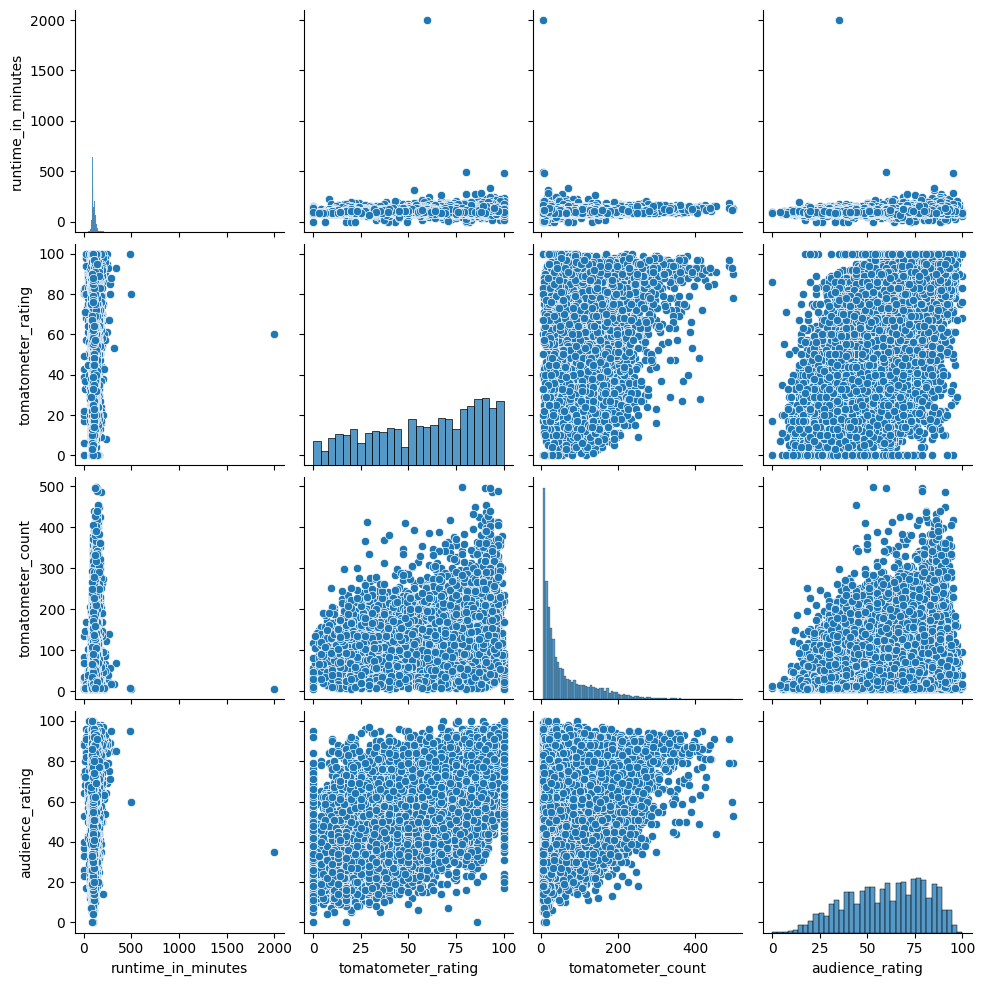

In [18]:
import seaborn as sns
sns.pairplot(dataset)

**Content rating counts**

In [19]:
dataset.columns

Index(['movie_title', 'movie_info', 'rating', 'genre', 'directors', 'writers',
       'cast', 'in_theaters_date', 'on_streaming_date', 'runtime_in_minutes',
       'studio_name', 'tomatometer_status', 'tomatometer_rating',
       'tomatometer_count', 'audience_rating'],
      dtype='object')

In [20]:
dataset['rating'].value_counts()

,count
rating,
R,5650
NR,3299
PG-13,2672
PG,1851
G,580
NC17,34
PG-13),3
R),1


<ipython-input-21-96f33f5d0eb4>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= dataset, x= 'rating', palette= 'plasma')


Text(0.5, 1.0, 'Content Rating')

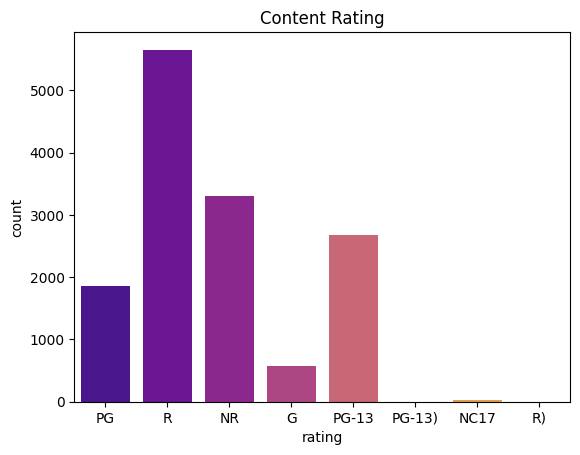

In [21]:
import seaborn as sns
sns.countplot(data= dataset, x= 'rating', palette= 'plasma')

plt.title('Content Rating')

**No of Fresh, Certified Fresh and Rotten Movies**



In [22]:
dataset['tomatometer_status'].value_counts()

,count
tomatometer_status,
Rotten,6468
Fresh,4969
Certified Fresh,2653


<ipython-input-23-7b8813b64a99>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data= dataset, x= 'tomatometer_status', palette= 'bright')


Text(0.5, 1.0, 'No of Fresh, Certified Fresh and Rotten Movies')

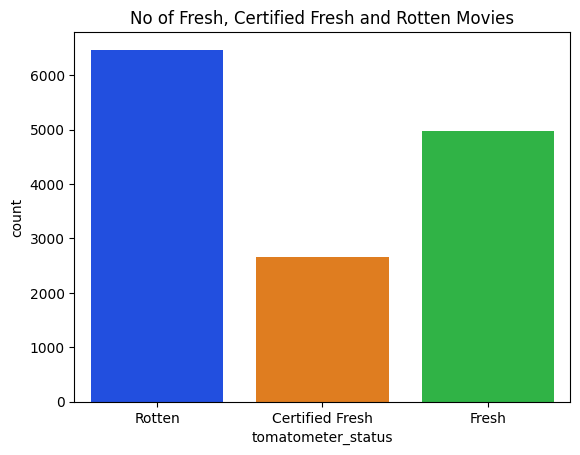

In [23]:
sns.countplot(data= dataset, x= 'tomatometer_status', palette= 'bright')

plt.title('No of Fresh, Certified Fresh and Rotten Movies')

**Converting Categoric value to numeric value**

In [24]:
#Replacing tomatometer_status with numeric values
dataset['tomatometer_status'].replace(['Rotten', 'Fresh', 'Certified Fresh'], [0, 1, 2], inplace=True)

<ipython-input-24-a91da28da3ca>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['tomatometer_status'].replace(['Rotten', 'Fresh', 'Certified Fresh'], [0, 1, 2], inplace=True)
<ipython-input-24-a91da28da3ca>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dataset['tomatometer_status'].repla

In [25]:
dataset['tomatometer_status'].value_counts()

,count
tomatometer_status,
0,6468
1,4969
2,2653


**Genres**

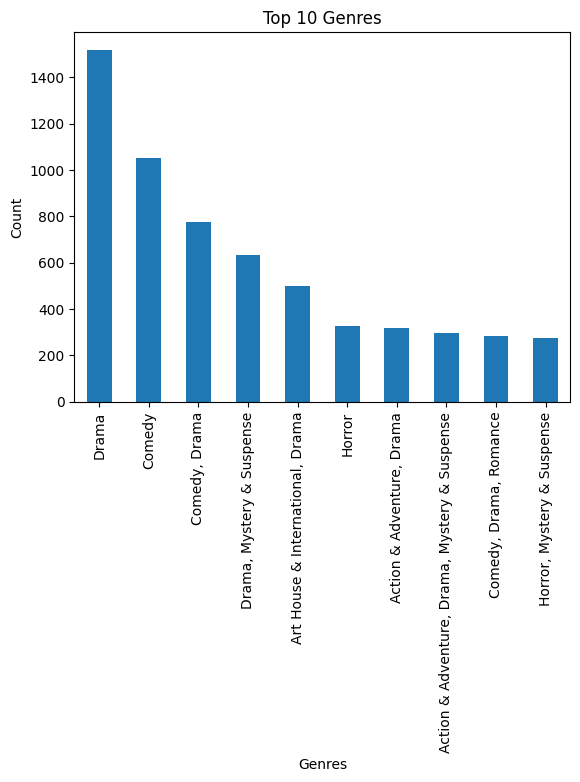

In [26]:
dataset['genre'].value_counts()[:10].plot.bar()
plt.title('Top 10 Genres')
plt.ylabel('Count')
plt.xlabel('Genres')
plt.show()

**Correlation**

<Axes: >

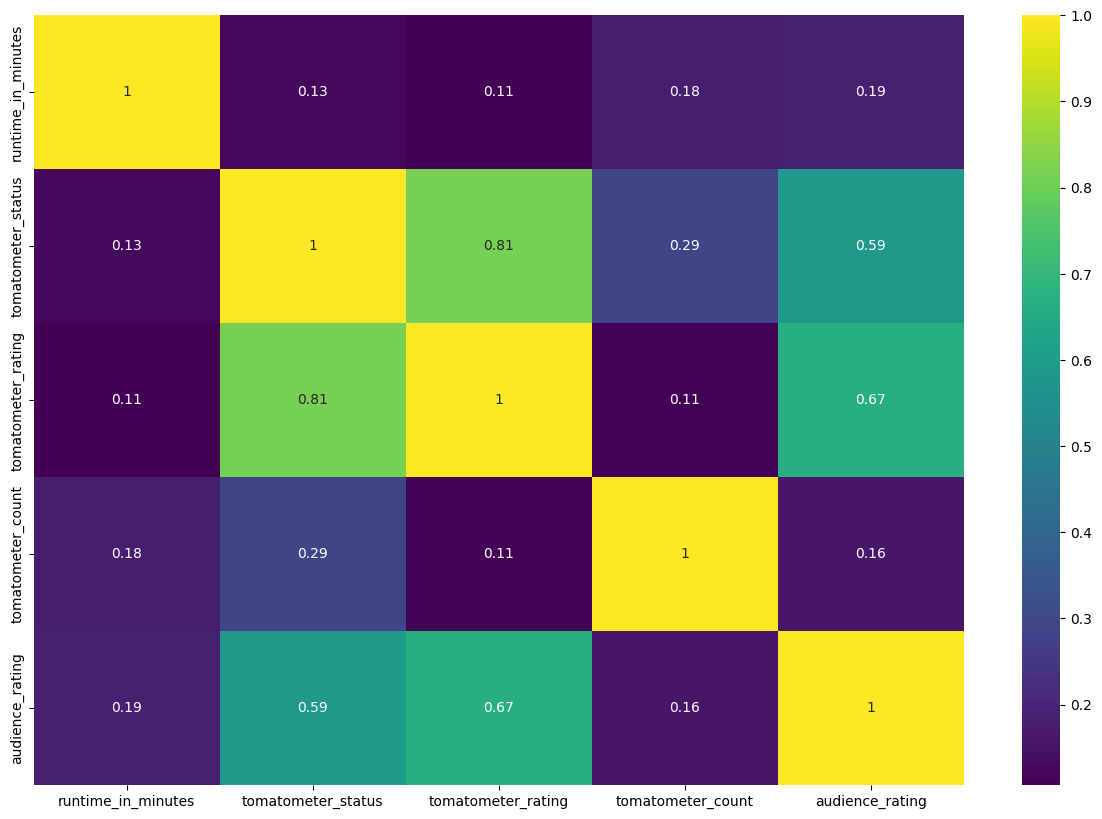

In [27]:
corr = dataset.select_dtypes('number').corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='viridis')

In [28]:
#Correlation with the target value 'tomatometer_status'
dataset.select_dtypes('number').corr()['tomatometer_status'].sort_values(ascending=False)

,tomatometer_status
tomatometer_status,1.000000
tomatometer_rating,0.813962
audience_rating,0.590790
tomatometer_count,0.290916
runtime_in_minutes,0.126127


**4. Feature Engineering**

In [29]:
dataset.dtypes

,0
movie_title,object
movie_info,object
rating,object
genre,object
directors,object
writers,object
cast,object
in_theaters_date,datetime64[ns]
on_streaming_date,datetime64[ns]
runtime_in_minutes,float64


In [30]:
# select the relevent features

df = dataset[['genre', 'rating', 'runtime_in_minutes', 'tomatometer_rating',
         'tomatometer_count', 'in_theaters_date', 'tomatometer_status',
         'audience_rating']]
df.head()

,genre,rating,runtime_in_minutes,tomatometer_rating,tomatometer_count,in_theaters_date,tomatometer_status,audience_rating
0,"Action & Adventure, Comedy, Drama, Science Fic...",PG,83.0,49,144,2010-02-12,0,53.0
1,Comedy,R,90.0,86,140,2010-04-30,2,64.0
2,"Comedy, Romance",R,118.0,68,22,1979-10-05,1,53.0
3,"Classics, Drama",NR,95.0,100,51,1957-04-13,2,97.0
4,"Action & Adventure, Drama, Kids & Family",G,127.0,89,27,1954-01-01,1,74.0


**Converting Categorical to numeric**




One-hot encoding

In [31]:
df = pd.get_dummies(df, columns=['genre', 'rating', 'tomatometer_status'], drop_first=True)
df = df.astype(int)
df.head()

,runtime_in_minutes,tomatometer_rating,tomatometer_count,in_theaters_date,audience_rating,"genre_Action & Adventure, Animation","genre_Action & Adventure, Animation, Anime & Manga, Art House & International","genre_Action & Adventure, Animation, Anime & Manga, Art House & International, Science Fiction & Fantasy","genre_Action & Adventure, Animation, Anime & Manga, Science Fiction & Fantasy","genre_Action & Adventure, Animation, Art House & International",...,genre_Western,rating_NC17,rating_NR,rating_PG,rating_PG-13,rating_PG-13),rating_R,rating_R),tomatometer_status_1,tomatometer_status_2
0,83,49,144,1265932800000000000,53,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
1,90,86,140,1272585600000000000,64,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,118,68,22,307929600000000000,53,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
3,95,100,51,-401414400000000000,97,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,127,89,27,-504921600000000000,74,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


**Extract the dates feature**

In [32]:
# Convert 'in_theaters_date' to datetime
df['in_theaters_date'] = pd.to_datetime(df['in_theaters_date'], errors='coerce')

# Extract year and month
df['release_year'] = df['in_theaters_date'].dt.year
df['release_month'] = df['in_theaters_date'].dt.month

# Drop the original date column
df.drop(columns=['in_theaters_date'], inplace=True)

# Check the updated dataframe
df.head()


,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,"genre_Action & Adventure, Animation","genre_Action & Adventure, Animation, Anime & Manga, Art House & International","genre_Action & Adventure, Animation, Anime & Manga, Art House & International, Science Fiction & Fantasy","genre_Action & Adventure, Animation, Anime & Manga, Science Fiction & Fantasy","genre_Action & Adventure, Animation, Art House & International","genre_Action & Adventure, Animation, Art House & International, Comedy, Science Fiction & Fantasy",...,rating_NR,rating_PG,rating_PG-13,rating_PG-13),rating_R,rating_R),tomatometer_status_1,tomatometer_status_2,release_year,release_month
0,83,49,144,53,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2010,2
1,90,86,140,64,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,2010,4
2,118,68,22,53,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1979,10
3,95,100,51,97,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1957,4
4,127,89,27,74,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1954,1


In [33]:
# Check the final dataset
df.info()



<class 'pandas.core.frame.DataFrame'>
Index: 14090 entries, 0 to 16637
Columns: 993 entries, runtime_in_minutes to release_month
dtypes: int32(2), int64(991)
memory usage: 106.7 MB


In [34]:

df.head()


,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,"genre_Action & Adventure, Animation","genre_Action & Adventure, Animation, Anime & Manga, Art House & International","genre_Action & Adventure, Animation, Anime & Manga, Art House & International, Science Fiction & Fantasy","genre_Action & Adventure, Animation, Anime & Manga, Science Fiction & Fantasy","genre_Action & Adventure, Animation, Art House & International","genre_Action & Adventure, Animation, Art House & International, Comedy, Science Fiction & Fantasy",...,rating_NR,rating_PG,rating_PG-13,rating_PG-13),rating_R,rating_R),tomatometer_status_1,tomatometer_status_2,release_year,release_month
0,83,49,144,53,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2010,2
1,90,86,140,64,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,2010,4
2,118,68,22,53,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1979,10
3,95,100,51,97,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1957,4
4,127,89,27,74,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1954,1


In [35]:
df

,runtime_in_minutes,tomatometer_rating,tomatometer_count,audience_rating,"genre_Action & Adventure, Animation","genre_Action & Adventure, Animation, Anime & Manga, Art House & International","genre_Action & Adventure, Animation, Anime & Manga, Art House & International, Science Fiction & Fantasy","genre_Action & Adventure, Animation, Anime & Manga, Science Fiction & Fantasy","genre_Action & Adventure, Animation, Art House & International","genre_Action & Adventure, Animation, Art House & International, Comedy, Science Fiction & Fantasy",...,rating_NR,rating_PG,rating_PG-13,rating_PG-13),rating_R,rating_R),tomatometer_status_1,tomatometer_status_2,release_year,release_month
0,83,49,144,53,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2010,2
1,90,86,140,64,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,2010,4
2,118,68,22,53,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,1979,10
3,95,100,51,97,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,1957,4
4,127,89,27,74,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1954,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16632,88,3,66,33,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,2006,8
16633,104,56,9,74,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1981,10
16634,108,97,279,92,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,2016,3
16636,139,95,21,91,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,1964,6


**5. Train Test Split**

In [36]:
X = df.drop('audience_rating', axis=1)
y = df['audience_rating']

In [37]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

**5. Model Creation**

In [39]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [40]:
y_pred_linear = linear_model.predict(X_test)

In [41]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_linear)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred_linear)
print("R-squared:", r2)


Mean Squared Error: 197.5366863743731
R-squared: 0.5273902374336072


In [42]:
from sklearn.svm import SVR
supportvector_model = SVR(kernel ='linear')
supportvector_model.fit(X_train, y_train)

SVR(kernel='linear')

In [43]:
y_pred_svr = supportvector_model.predict(X_test)

In [44]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_svr)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred_svr)
print("R-squared:", r2)


Mean Squared Error: 197.06090525560236
R-squared: 0.5285285515650373


In [45]:
from sklearn.tree import DecisionTreeRegressor
decisiontree_model = DecisionTreeRegressor(random_state= 0)
decisiontree_model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [46]:
y_pred_dt = decisiontree_model.predict(X_test)

In [47]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_dt)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred_dt)
print("R-squared:", r2)


Mean Squared Error: 347.8502484031228
R-squared: 0.16776257451796417


In [48]:
from sklearn.ensemble import RandomForestRegressor
randomforest_model = RandomForestRegressor(n_estimators = 10, random_state = 0)
randomforest_model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

In [49]:
y_pred_rf = randomforest_model.predict(X_test)

In [50]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_rf)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred_rf)
print("R-squared:", r2)


Mean Squared Error: 196.5423775727466
R-squared: 0.5297691375522605


In [51]:
from sklearn.linear_model import ElasticNet
ecnet_model = ElasticNet(alpha=1.0, l1_ratio=0.5, random_state=None)
ecnet_model.fit(X_train,y_train)

ElasticNet()

In [52]:
y_pred_ecnet = ecnet_model.predict(X_test)

In [53]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_ecnet)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred_ecnet)
print("R-squared:", r2)


Mean Squared Error: 221.09928933441236
R-squared: 0.4710163233279233


In [54]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsRegressor()

In [55]:
y_pred_knn = knn_model.predict(X_test)

In [56]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred_knn)
print("Mean Squared Error:", mse)
r2 = r2_score(y_test, y_pred_knn)
print("R-squared:", r2)


Mean Squared Error: 259.94102200141947
R-squared: 0.3780868407576262


Compare all the models and save the model which is giving better result. If r2 score is close to 1 or 1 its an good model, and MSE should be close to 0 if it is close to 0 the model be good.

So, here while comparing the result random forest performs better, but not a good model.

In [57]:
import joblib
joblib.dump(randomforest_model, 'randomforest_model.pkl')
print("Model saved")

Model saved


After this can able to use the saved model to predict the audience rating and it can able to deploy as an user friendly app.

Future Work:

Needs to work with data and feature engineering process to select the best features.

Develope an application and deploy it in cloud platform for user's hand.